In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv(r'C:\Users\user\Downloads\Election_Data.csv')

In [4]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [10]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [11]:
# Are there any missing values ?
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

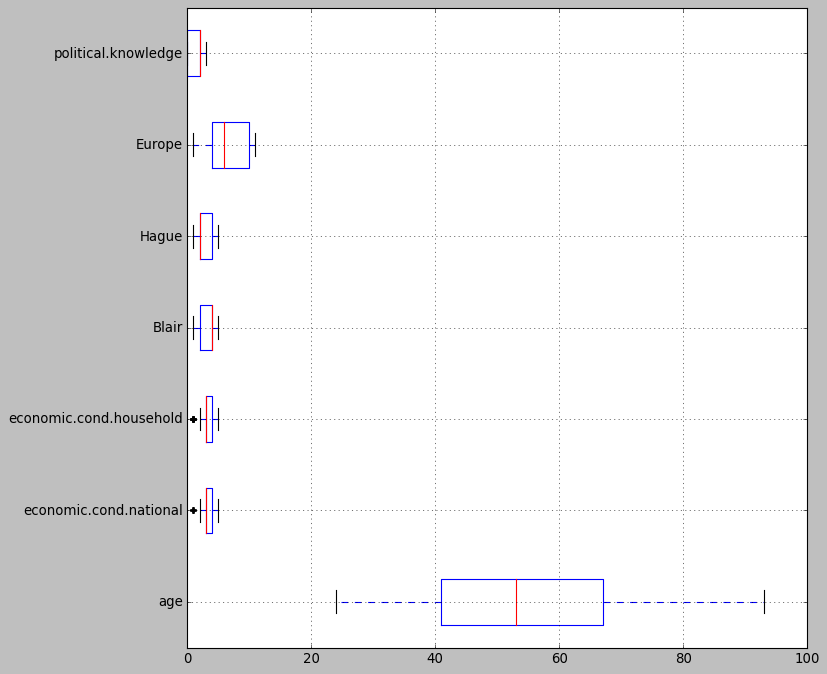

In [13]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [15]:
## Check the unique values
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [16]:
### Univariate Analysis

In [17]:
#Univariate Analysis 
##In order to do Univariate analysis let us take a column of data - 'political.knowledge'
## Storing the political.knowledge column in a variable in "data"

In [18]:
data = df['political.knowledge']

In [19]:
len(data)

1525

In [20]:
# checking for missing values

data.isnull().sum()

0

(array([455.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  38.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        782.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 250.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.76, 2.82, 2.88, 2.94, 3.  ]),
 <BarContainer object of 50 artists>)

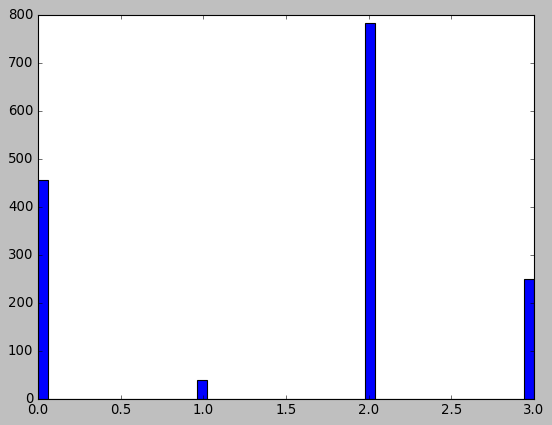

In [21]:
# The below code plots a histrogram 
plt.hist(data, bins=50)

<AxesSubplot:xlabel='political.knowledge', ylabel='Density'>

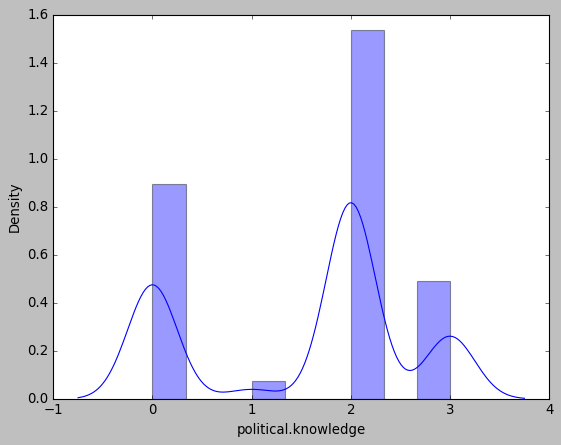

In [22]:
sns.distplot(data)

<AxesSubplot:xlabel='political.knowledge', ylabel='Density'>

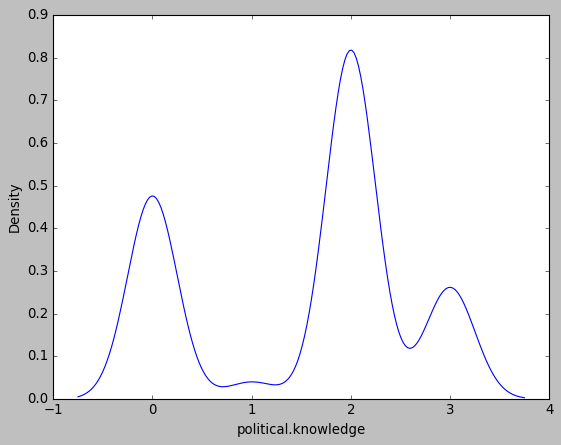

In [23]:
sns.distplot(data, hist=False) # removes the histogram and shows only the frequency

<AxesSubplot:xlabel='political.knowledge'>

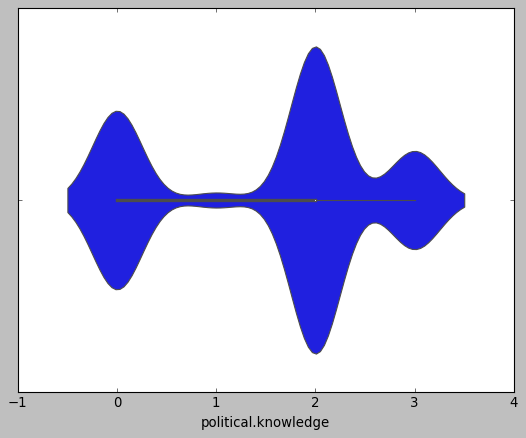

In [24]:
sns.violinplot(data) # plots a violin plt

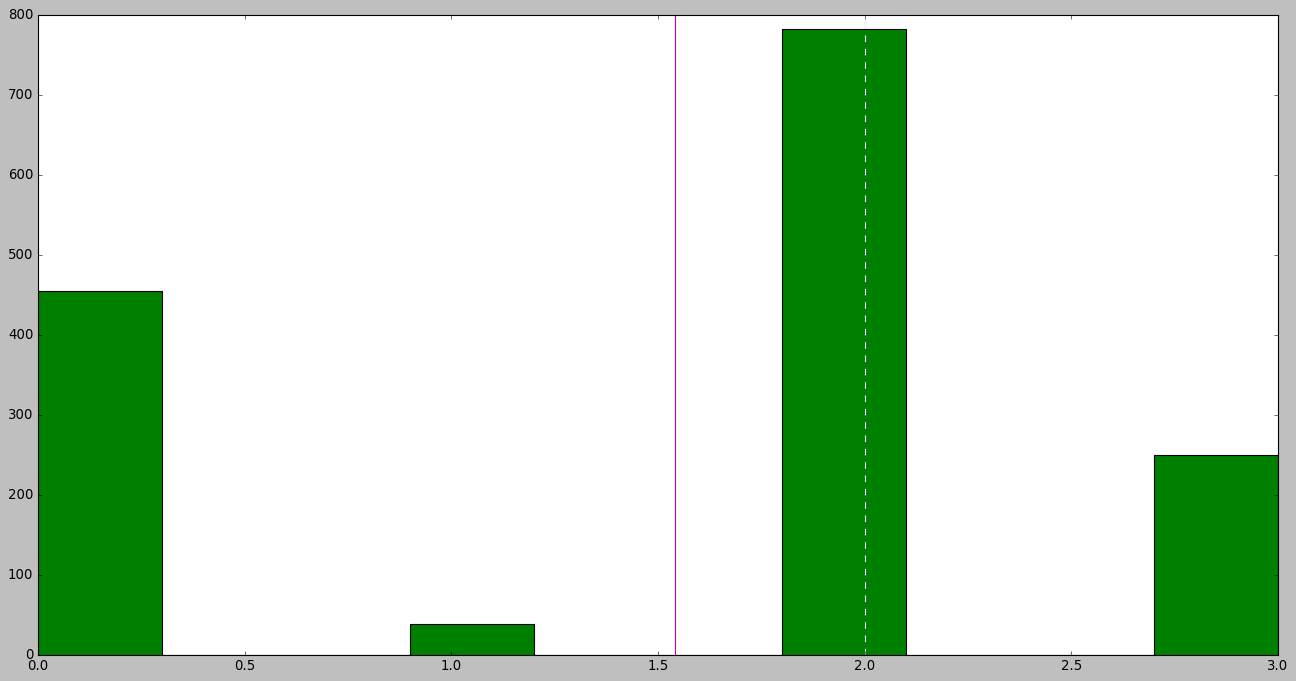

In [25]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data, color='g') # plots a simple histogram
plt.axvline(data.mean(), color='m', linewidth=1)
plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=1)

<AxesSubplot:xlabel='political.knowledge', ylabel='Density'>

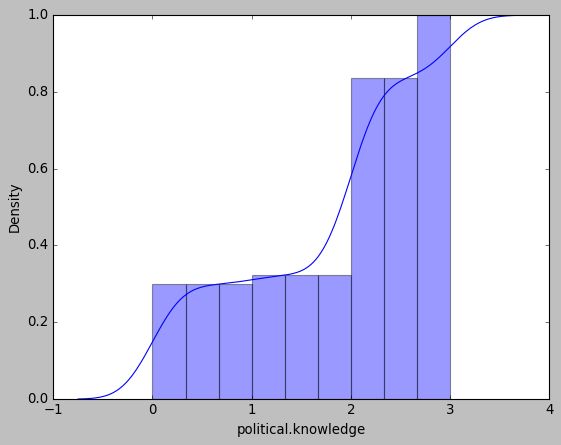

In [26]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

In [27]:
#Performing Univariate analysis on another varibale "economic.cond.national"
##I'm saving the economic.cond.national data in data1

In [28]:
data1 = df['economic.cond.national']

In [29]:
len(data1)

1525

In [30]:
# checking for missing values

data1.isnull().sum()

0

(array([ 37.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 607.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 542.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  82.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.68, 4.76, 4.84, 4.92, 5.  ]),
 <BarContainer object of 50 artists>)

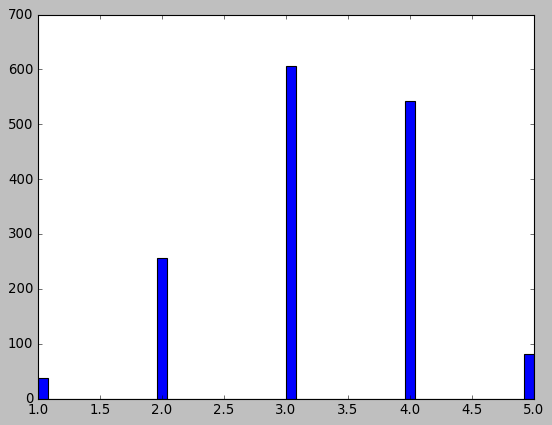

In [31]:
# The below code plots a histrogram 
plt.hist(data1, bins=50)

<AxesSubplot:xlabel='economic.cond.national', ylabel='Density'>

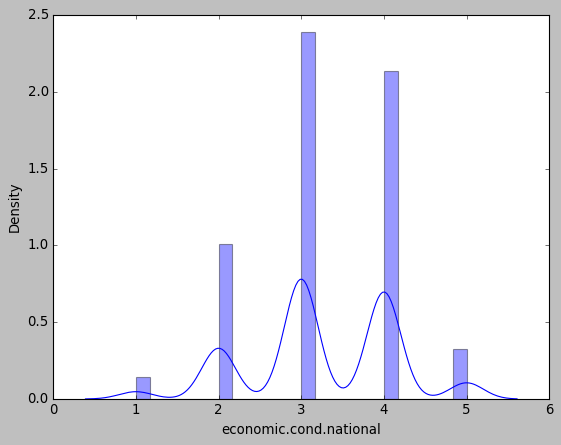

In [32]:
sns.distplot(data1)


<AxesSubplot:xlabel='economic.cond.national', ylabel='Density'>

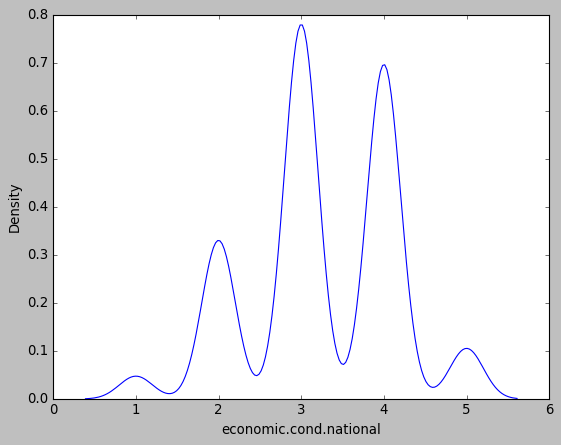

In [33]:
sns.distplot(data1, hist=False) # removes the histogram and shows only the frequency

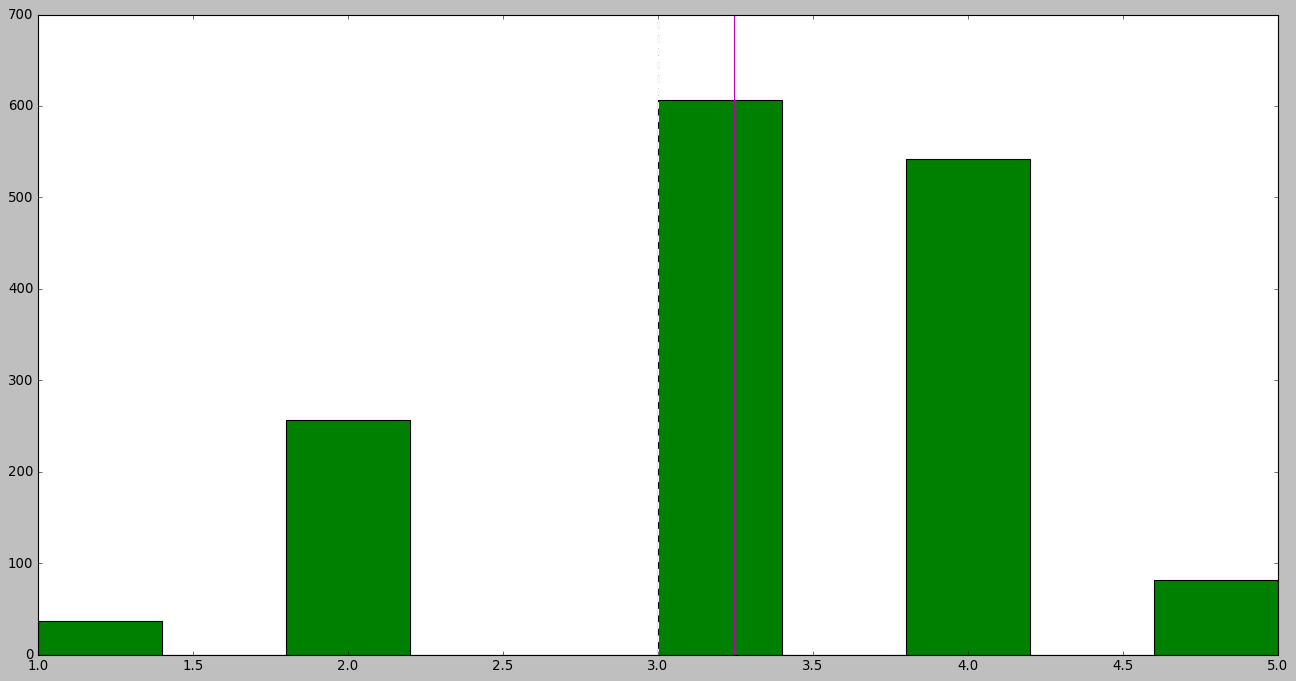

In [34]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data1, color='g') # plots a simple histogram
plt.axvline(data1.mean(), color='m', linewidth=1)
plt.axvline(data1.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data1.mode()[0], color='w', linestyle='dashed', linewidth=1)

<AxesSubplot:xlabel='economic.cond.national', ylabel='Density'>

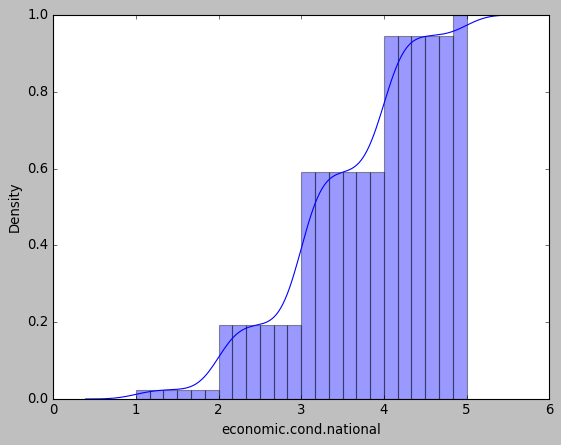

In [35]:
sns.distplot(data1, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

<AxesSubplot:>

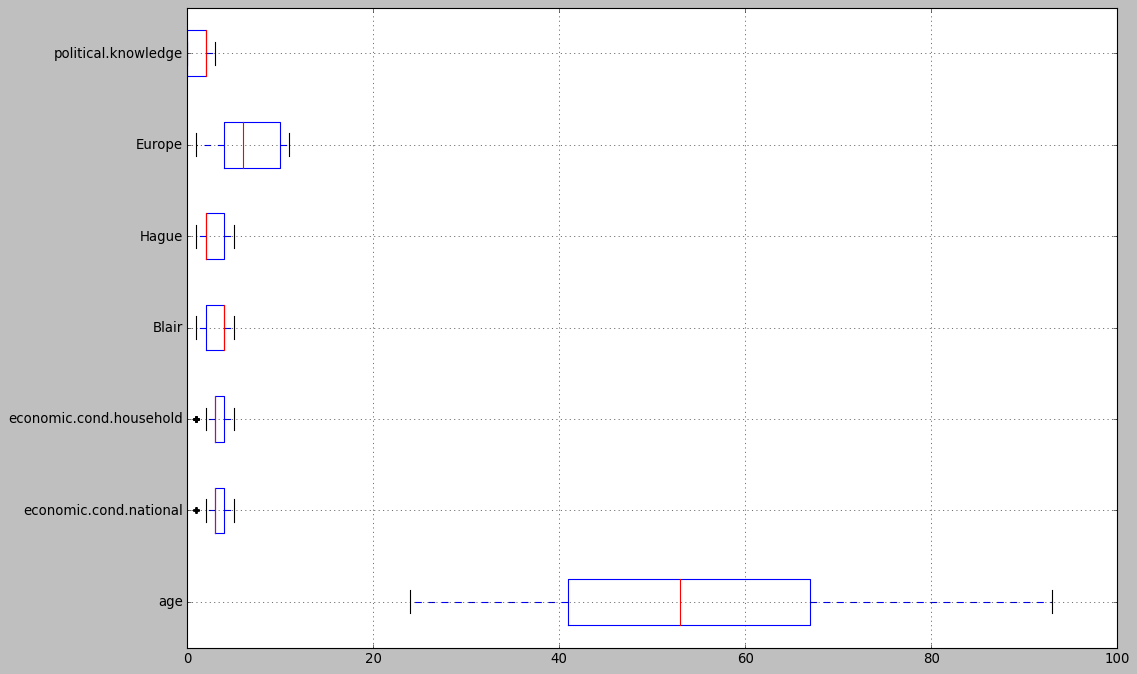

In [36]:
## Checking for Outliers
# construct box plot for continuous variables
plt.figure(figsize=(15,10))
df.boxplot(vert=0)

In [37]:
###  Bivariate and Multivariate Analysis

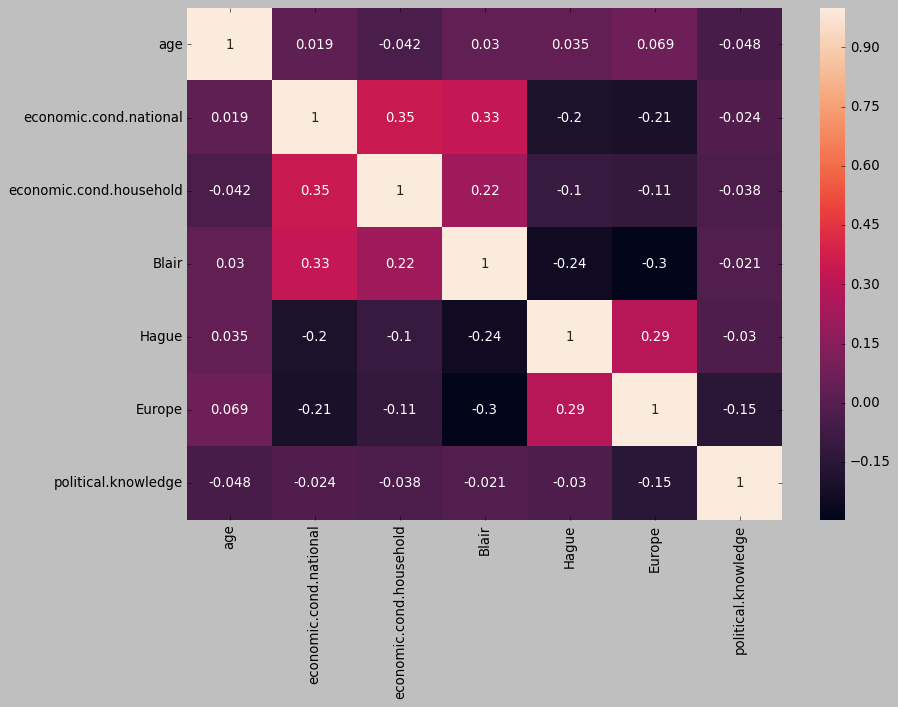

In [38]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

<Figure size 1120x1120 with 0 Axes>

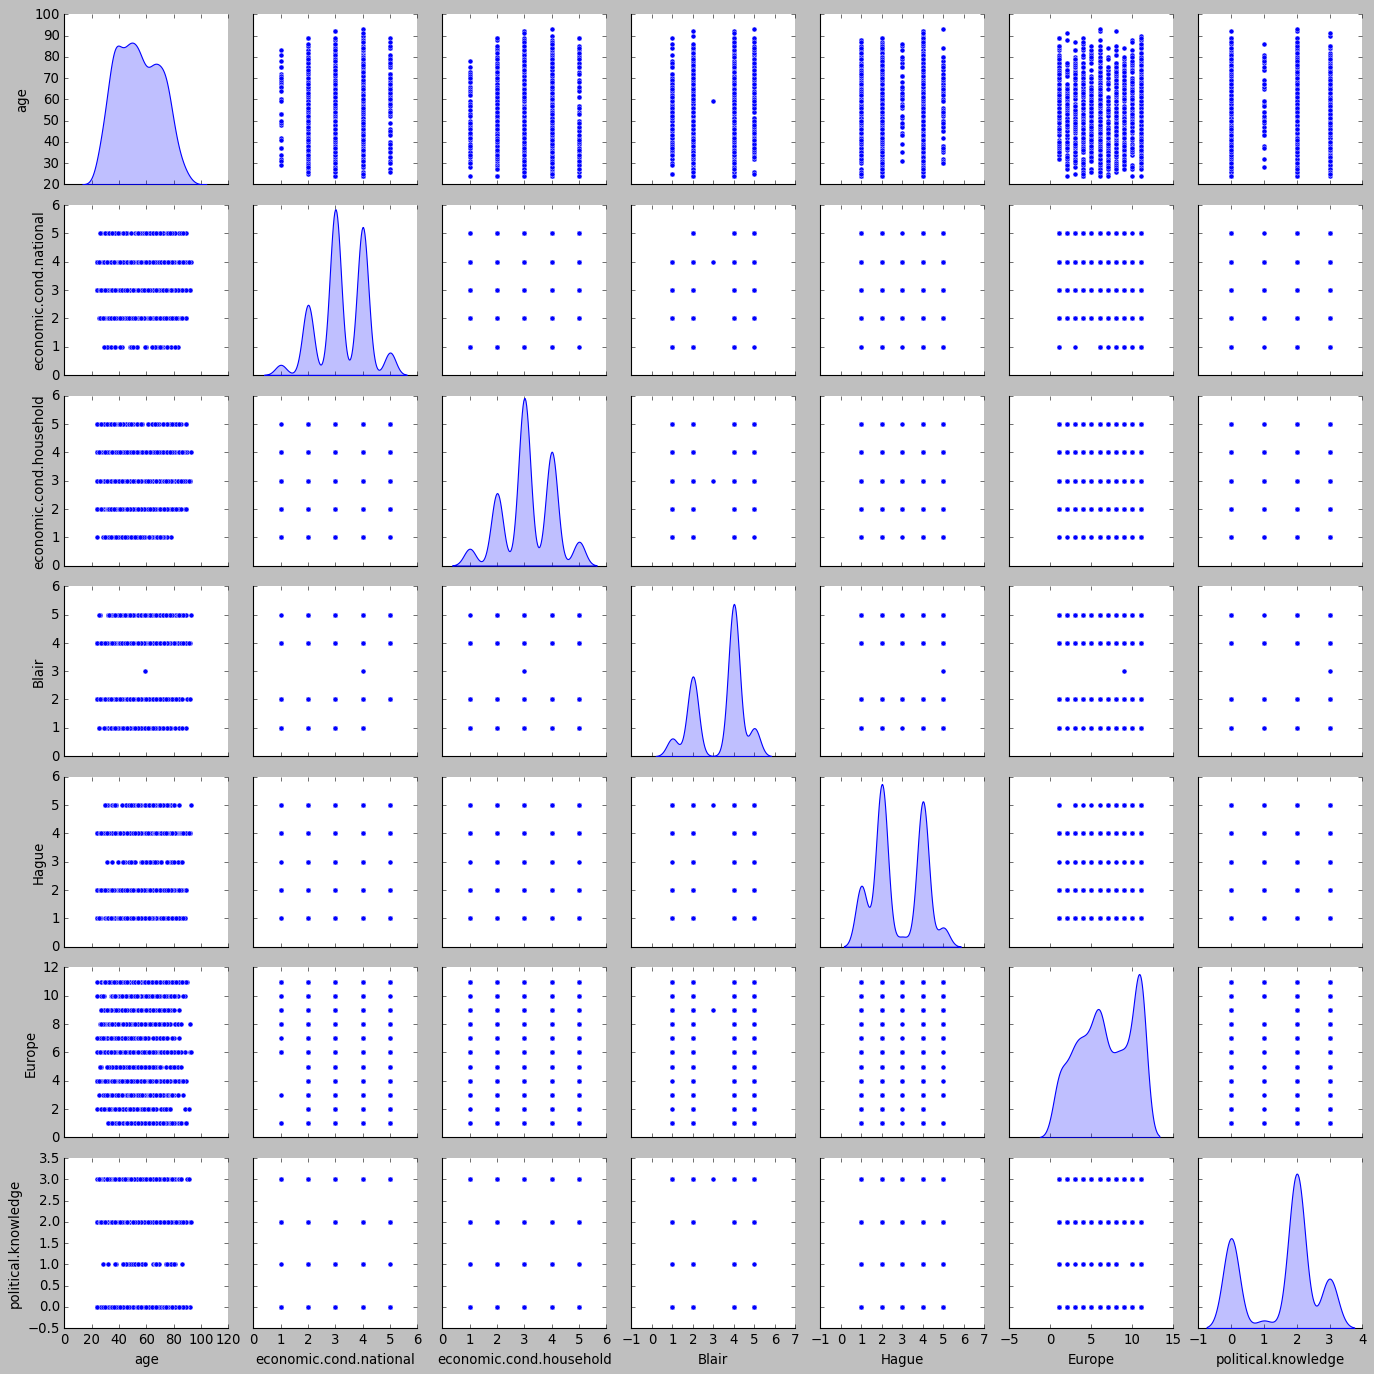

In [39]:
#Crossplots
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

<AxesSubplot:xlabel='Blair', ylabel='Hague'>

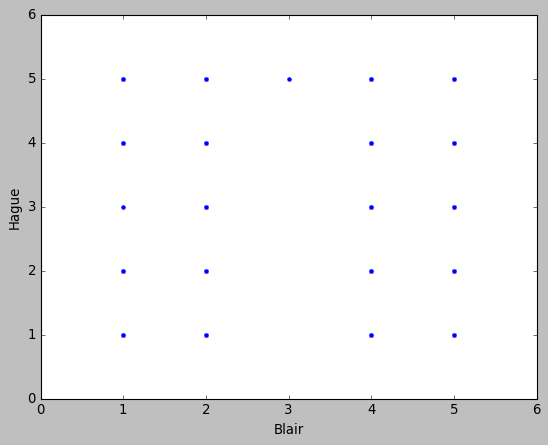

In [40]:
#A scatter plot can also be plotted for two columns

sns.scatterplot(df['Blair'], df['Hague']) 

In [41]:
df.corr()   # displays the correlation between every possible pair of attributes as a dataframe

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


<AxesSubplot:>

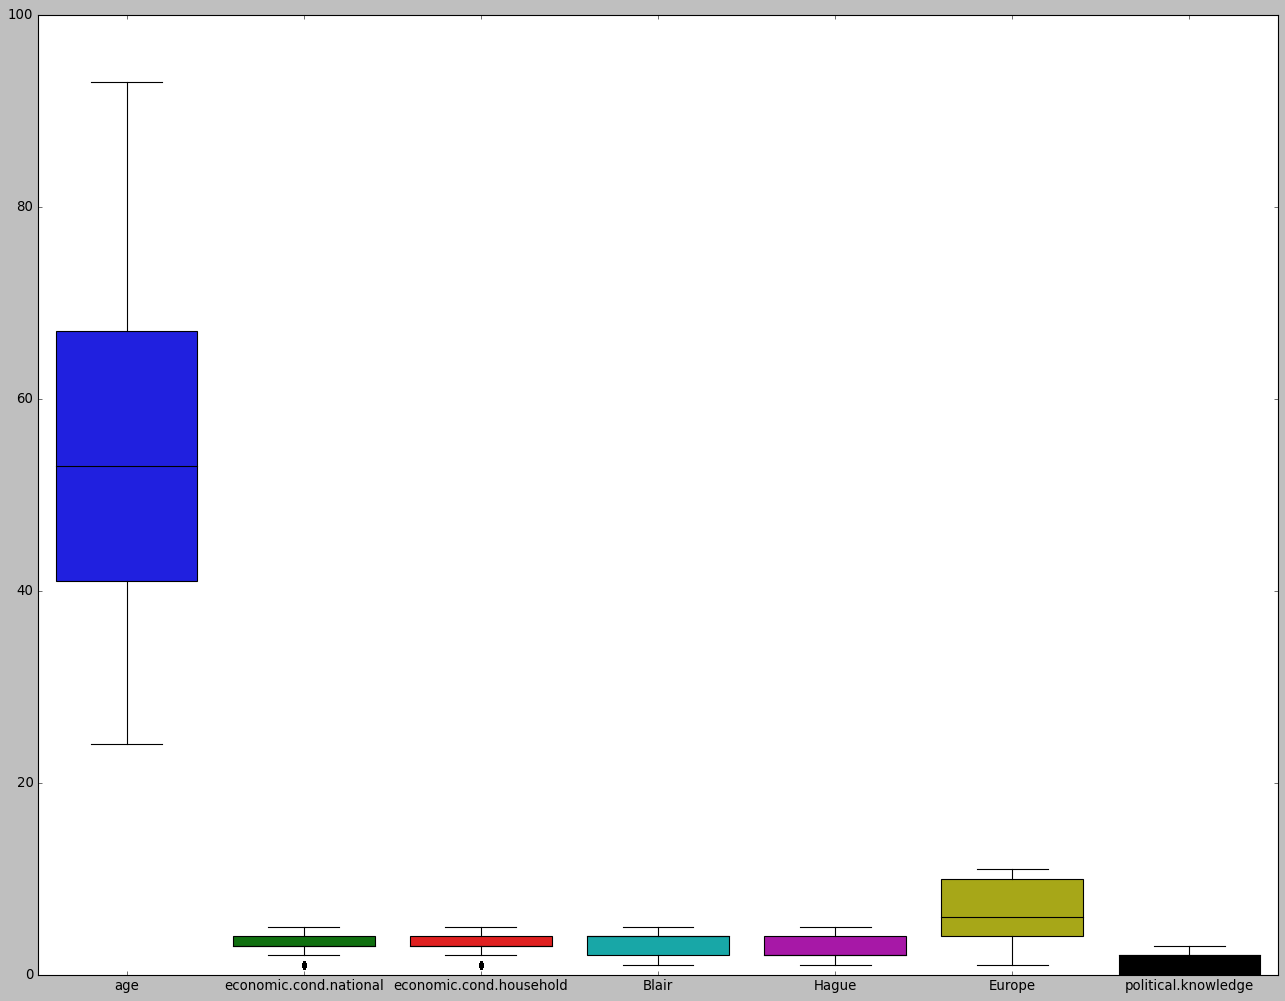

In [42]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

In [43]:
#### get_dummies of the object variables

In [45]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [46]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [47]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [49]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [50]:
num1=['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge'] 


In [51]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [52]:
## Check if the variables have been scaled or not
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,1,0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,1
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,1
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,1,0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,1


In [53]:
### Train-Test Split

In [54]:
df.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [55]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.  
y = df['vote_Labour']

In [56]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1


In [60]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote_Labour, dtype: uint8

In [61]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [64]:
#Logistic Regression
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [65]:
### Predicting on Training and Test dataset

In [66]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [67]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.933648,0.066352
1,0.689193,0.310807
2,0.333480,0.666520
3,0.477407,0.522593
4,0.157152,0.842848


In [68]:
## Model Evaluation
# Accuracy - Training Data
model.score(X_train, y_train)

0.8406747891283973

In [69]:
### AUC and ROC for the training data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.889


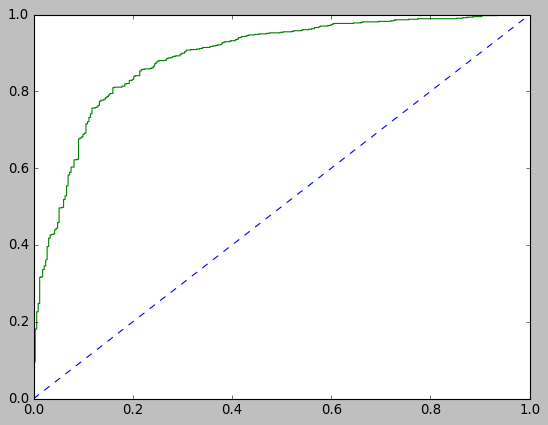

In [70]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [71]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8231441048034934

AUC: 0.889


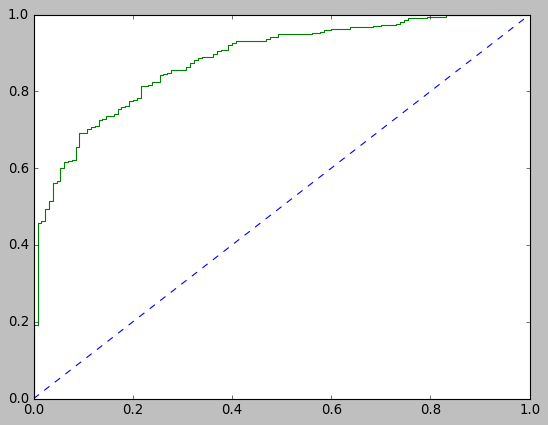

In [72]:
### AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [73]:
### Confusion Matrix for the training data

In [74]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

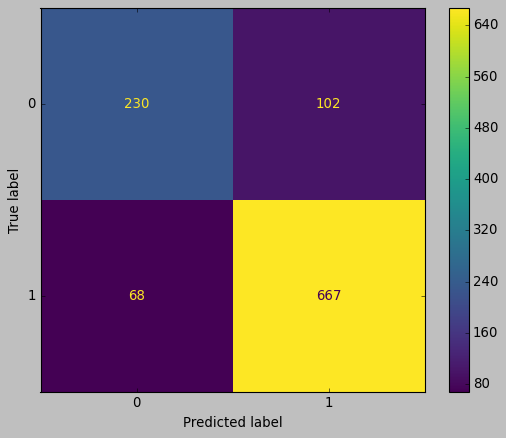

In [75]:
plot_confusion_matrix(model,X_train,y_train);

In [76]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [77]:
### Confusion Matrix for test data

In [78]:
confusion_matrix(y_test, ytest_predict)

array([[ 85,  45],
       [ 36, 292]], dtype=int64)

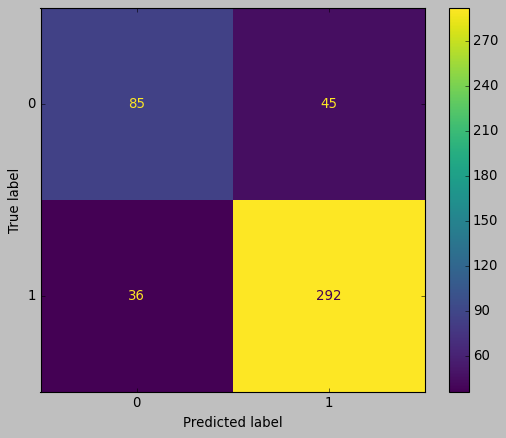

In [79]:
plot_confusion_matrix(model,X_test,y_test);

In [80]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [81]:
### linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale


In [84]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=1,stratify = y)

In [86]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [87]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [88]:
### Training Data and Test Data Confusion Matrix Comparison

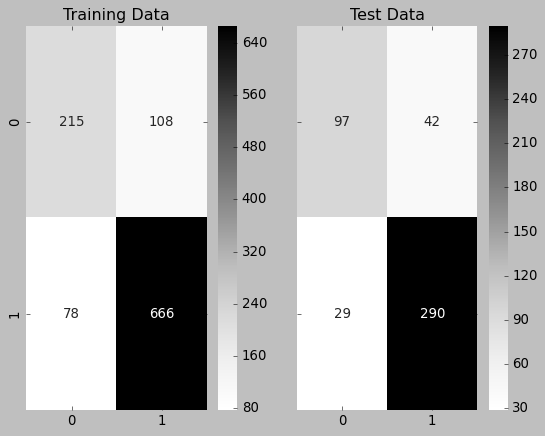

In [90]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [91]:
### Training Data and Test Data Classification Report Comparison
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



In [94]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.876
AUC for the Test Data: 0.915


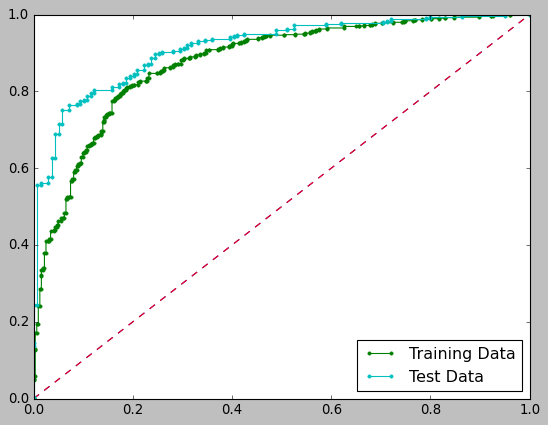

In [95]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [96]:
### Naive Bayes Model

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [98]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [99]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8219306466729147
[[223 100]
 [ 90 654]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       323
           1       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067



In [100]:
y_test.value_counts()

1    319
0    139
Name: vote_Labour, dtype: int64

In [101]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8471615720524017
[[101  38]
 [ 32 287]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



AUC: 0.876


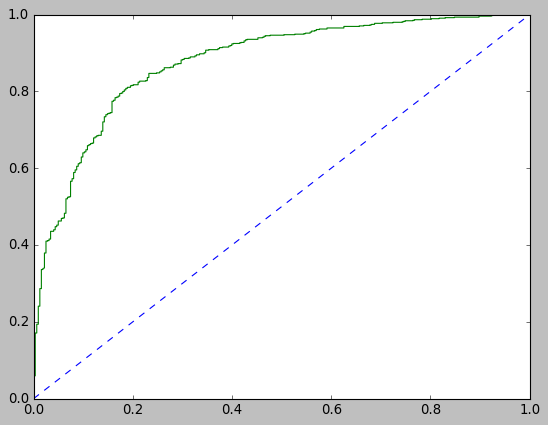

In [102]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [103]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8449781659388647

AUC: 0.876


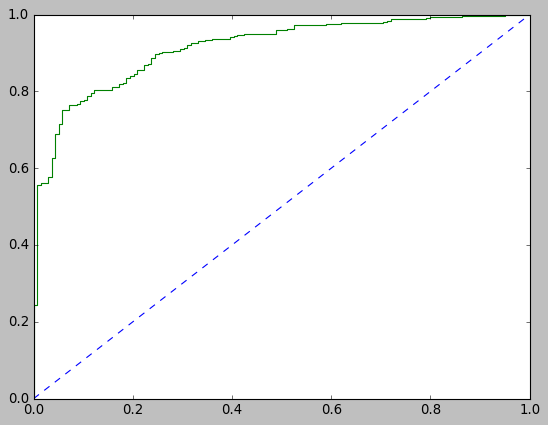

In [104]:
### AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [105]:
## KNN Model
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [106]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8678537956888472
[[238  85]
 [ 56 688]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       323
           1       0.89      0.92      0.91       744

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.87      0.87      0.87      1067



In [107]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8471615720524017
[[101  38]
 [ 32 287]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



AUC: 0.876


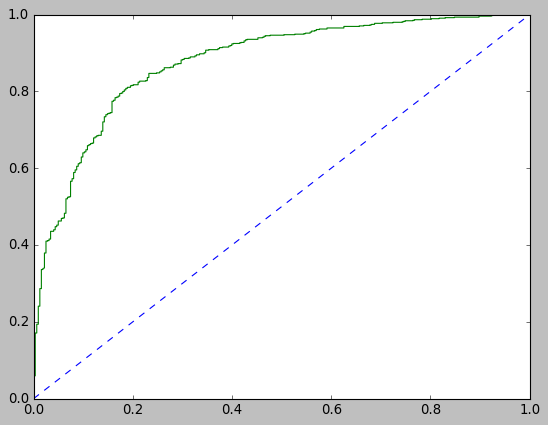

In [108]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.876


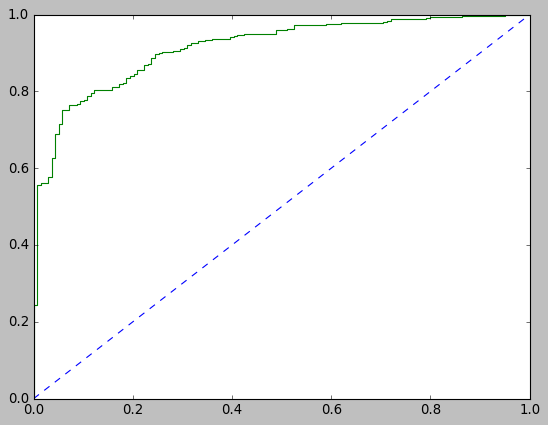

In [109]:
### AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [110]:
## Random Forest for bagging and boosting

In [111]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [112]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[322   1]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [113]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8493449781659389
[[ 94  45]
 [ 24 295]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



In [114]:
## Bagging

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [116]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[322   1]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [117]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 91  48]
 [ 33 286]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       139
           1       0.86      0.90      0.88       319

    accuracy                           0.82       458
   macro avg       0.80      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [120]:
##Boosting

In [118]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [119]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444236176194939
[[227  96]
 [ 70 674]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       323
           1       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [121]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8362445414847162
[[ 94  45]
 [ 30 289]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.71       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



In [122]:
## Gradient Boosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [124]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.887535145267104
[[246  77]
 [ 43 701]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       323
           1       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067



In [125]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8384279475982532
[[ 92  47]
 [ 27 292]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



In [128]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [130]:
results = []
names = []

In [131]:
scoring = 'accuracy'

LR: 0.834103 (0.040616)
LDA: 0.830164 (0.036580)
KNN: 0.813790 (0.030626)
CART: 0.754141 (0.020874)


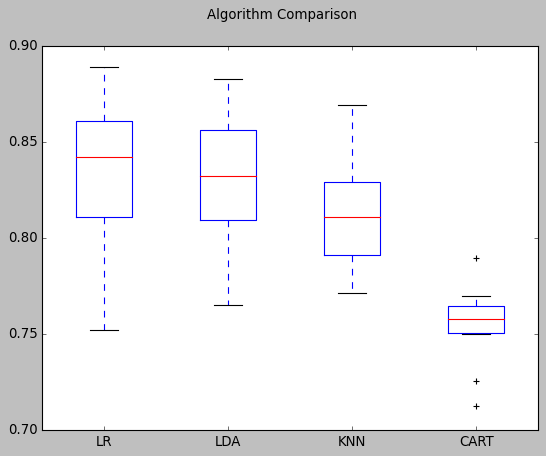

In [134]:
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [136]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490,-0.112821,-0.019746
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624,0.300737,0.054726
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810,0.174726,0.033853
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917,0.427084,0.070001
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354,-0.468508,-0.029408
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364,-0.385443,-0.077520
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000,-0.108653,0.158181
vote_Labour,-0.112821,0.300737,0.174726,0.427084,-0.468508,-0.385443,-0.108653,1.000000,0.037191
gender_male,-0.019746,0.054726,0.033853,0.070001,-0.029408,-0.077520,0.158181,0.037191,1.000000
